In [1]:
from collections import Counter
import json

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
with open("topo_data.json", "r") as file:
    data = json.load(file)

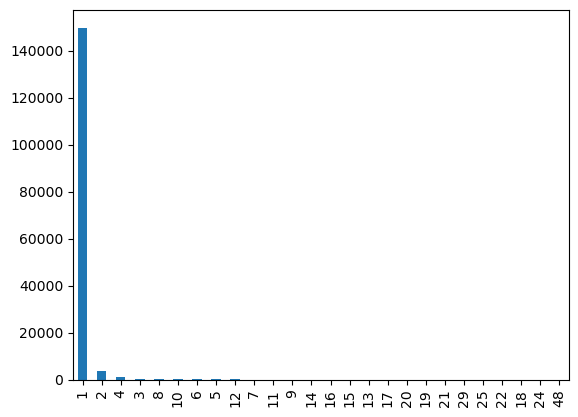

In [3]:
interp = [len(x["topology"]) for x in data.values()]
_ = pd.Series(interp).value_counts().plot(kind="bar")

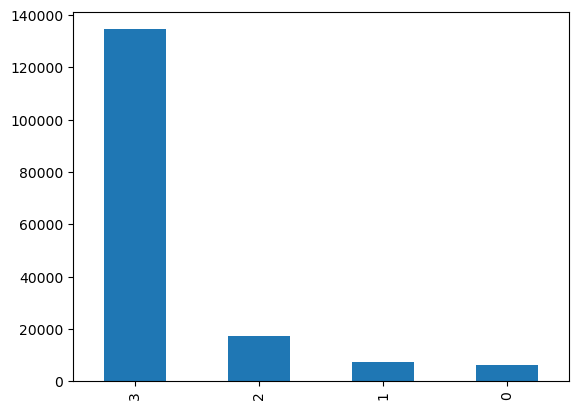

In [4]:
dim = pd.Series([y[1] for x in data.values() for y in x["topology"]])
_ = dim.value_counts().plot(kind="bar")

In [5]:
unknowns = Counter([y[2] for x in data.values() for y in x["topology"] if "UNKNOWN" in y[2]])
unstables = Counter([y[2] for x in data.values() for y in x["topology"] if "unstable" in y[2]])

mapping = {}
for i, (k, _) in enumerate(unknowns.most_common()):
    mapping[k] = f"unknown-{i}"

# The first one is the rod type
assert unknowns.most_common(1)[0][0] == "UNKNOWN 1 1 1 1"
mapping["UNKNOWN 1 1 1 1"] = "rod"

for i, (k, _) in enumerate(unstables.most_common()):
    mapping[k] = f"unstable-{i+1}"

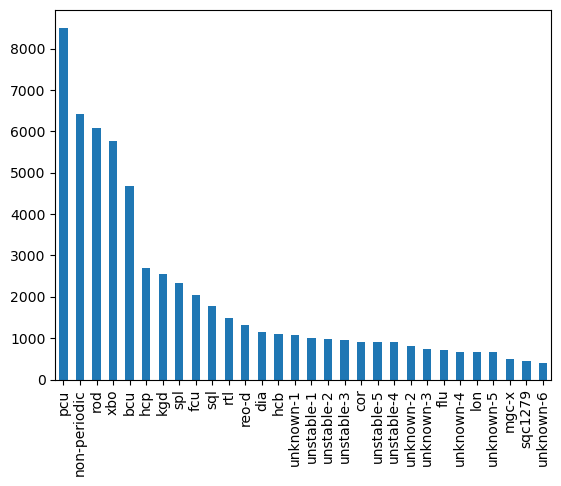

In [6]:
def short(net):
    if "UNKNOWN" in net or "unstable" in net:
        return mapping[net]
    else:
        return net

net = pd.Series([short(y[2]) for x in data.values() for y in x["topology"]])
_ = net.value_counts()[:30].plot(kind="bar")

Number of types of known nets: 655


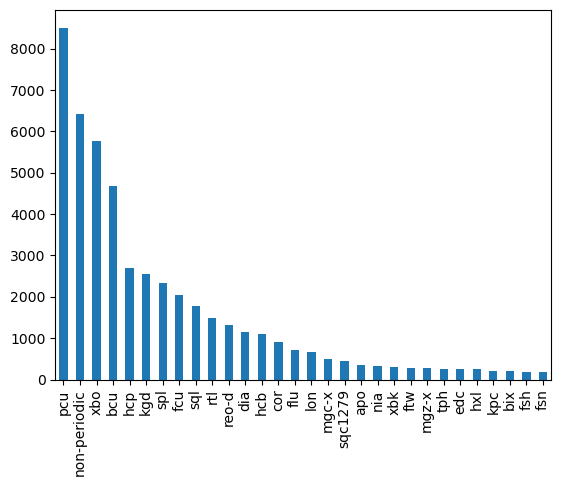

In [7]:
named_net = pd.Series([y[2] for x in data.values() for y in x["topology"] if "unstable" not in y[2] and "UNKNOWN" not in y[2]])
_ = named_net.value_counts()[:30].plot(kind="bar")
print("Number of types of known nets:", len(named_net.unique()))

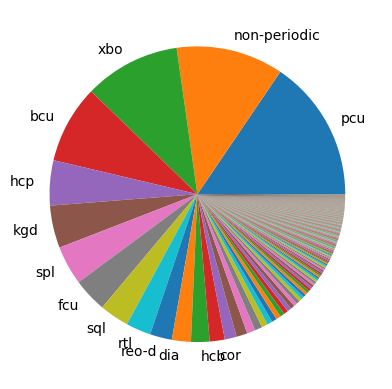

In [8]:
counts = Counter(named_net)
_ = plt.pie([float(v) for _, v in counts.most_common()], labels=[k if v > 800 else '' for k, v in counts.most_common()], autopct=None)

Number of types of 2D nets: 3448


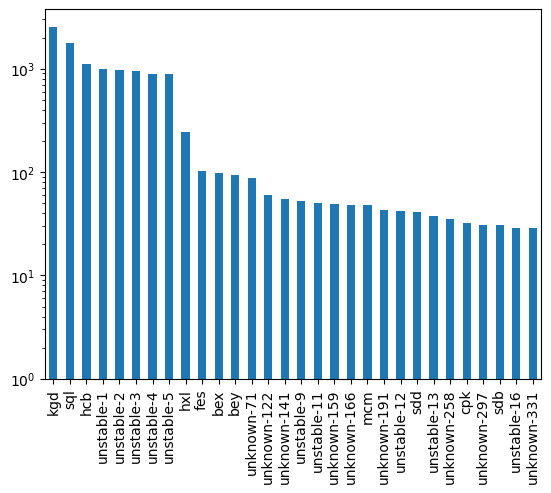

In [9]:
net_2d = pd.Series([short(y[2]) for x in data.values() for y in x["topology"] if y[1] == 2])
# net_2d = net_2d[~net_2d.isin(["unknown", "unstable", "non-periodic"])]
_ = net_2d.value_counts()[:30].plot(kind="bar", log=True)
print("Number of types of 2D nets:", len(net_2d.unique()))

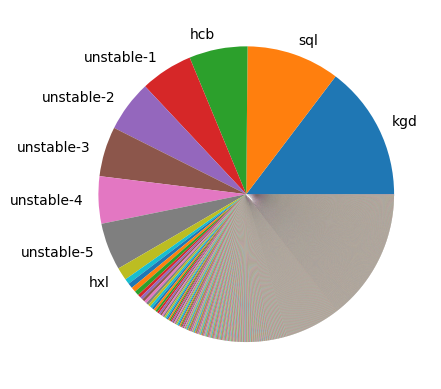

In [12]:
counts = Counter(net_2d)
_ = plt.pie([float(v) for _, v in counts.most_common()], labels=[k if v > 120 else '' for k, v in counts.most_common()], autopct=None)

Number of types of 1D nets: 104


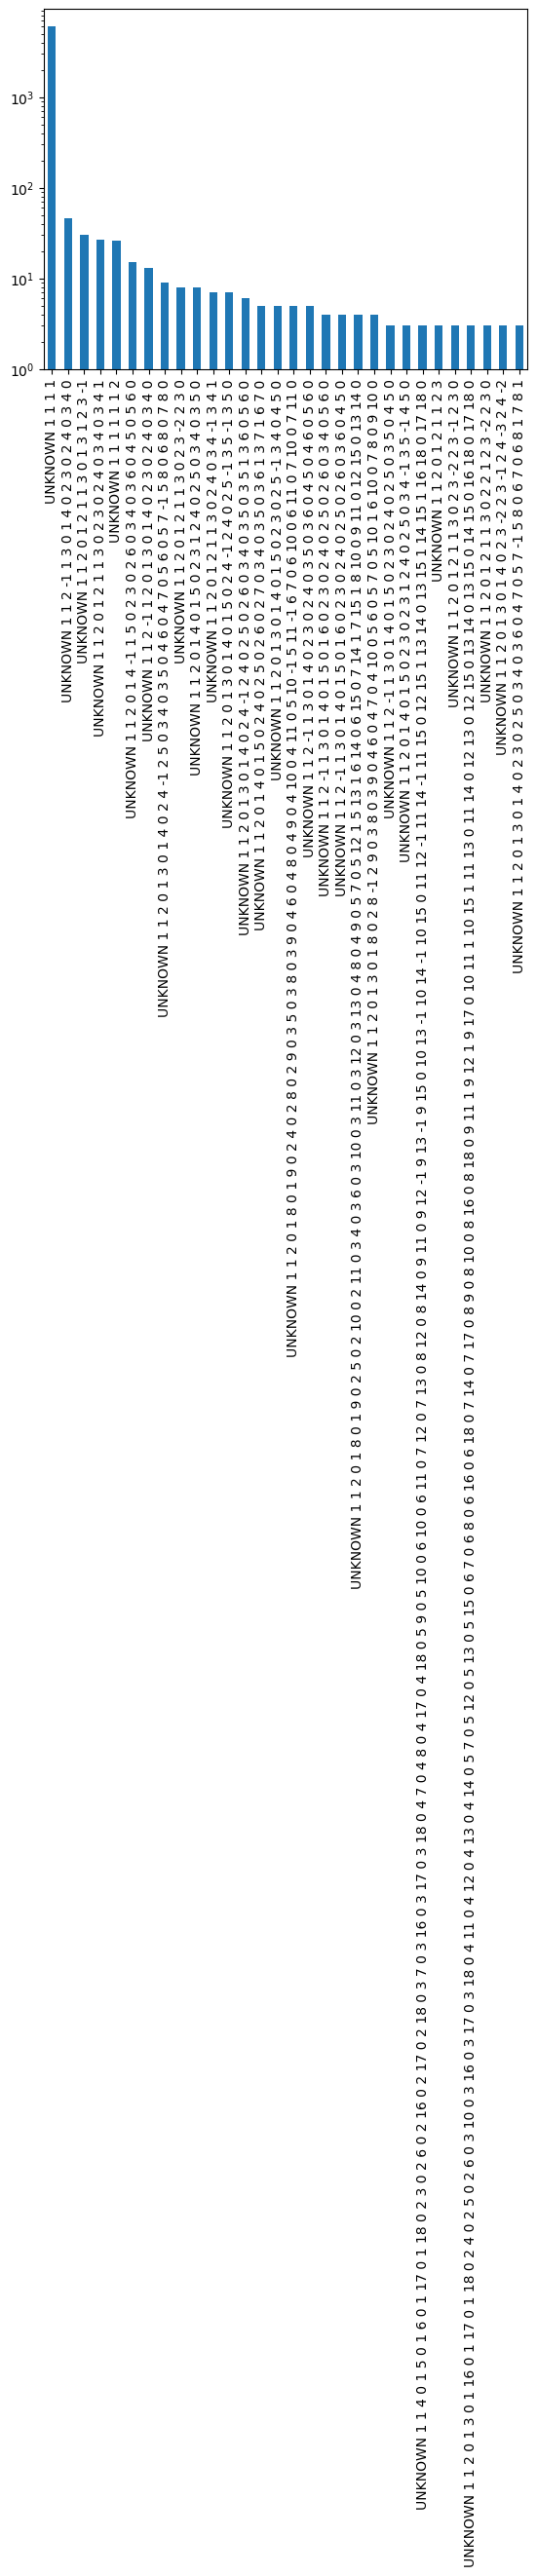

In [13]:
net_1d = pd.Series([y[2] for x in data.values() for y in x["topology"] if y[1] == 1 and "unstable" not in y[2]])
_ = net_1d.value_counts()[:30].plot(kind="bar", log=True)
print("Number of types of 1D nets:", len(net_1d.unique()))

In [14]:
unk_1 = [x for x in data.values() for y in x["topology"] if short(y[2]) == "unknown-1"]
unk_1[:20]

[{'material_id': 'mp-1340624',
  'formula_pretty': 'CaSbO3',
  'nelements': 3,
  'theoretical': True,
  'is_stable': None,
  'crystal_system': 'Monoclinic',
  'space_group': 11,
  'coordination': [['O', 4], ['O', 5], ['Sb', 6], ['Ca', 8]],
  'bonds': [['Sb', 'O'], ['Ca', 'O']],
  'topology': [[1,
    3,
    'UNKNOWN 3 1 2 0 0 0 1 3 0 0 0 1 4 0 0 0 1 5 0 0 0 2 6 0 0 0 2 7 0 0 0 2 8 0 0 0 2 9 0 0 0 2 10 0 0 0 2 11 0 0 0 2 12 0 0 0 3 6 -1 1 0 3 7 -1 0 0 3 9 -1 0 0 3 11 0 -1 0 3 12 0 -1 0 3 13 0 0 0 3 14 0 0 0 4 7 -1 1 0 4 8 0 0 0 4 11 0 0 0 4 13 0 0 0 4 15 0 0 0 5 9 -1 1 0 5 10 0 0 0 5 12 0 0 0 5 14 0 0 0 5 15 0 0 1 6 16 0 0 0 6 17 0 0 0 7 16 0 1 0 7 18 0 0 0 8 16 0 0 0 8 18 0 0 0 8 19 0 0 0 9 17 0 1 0 9 18 0 0 1 10 17 0 0 0 10 18 0 0 1 10 19 0 0 1 11 16 0 1 0 11 19 0 1 0 12 17 0 1 0 12 19 0 1 1 13 16 -1 1 0 13 18 -1 1 0 13 19 0 0 0 14 17 -1 1 0 14 18 -1 1 1 14 19 0 0 1 15 18 -1 1 0 15 19 0 1 0 16 20 0 0 0 17 20 0 0 1 18 20 0 1 0 19 20 0 0 0']]},
 {'material_id': 'mp-1639105',
  'formula_